In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import seaborn as sns

In [3]:
nltk.download('vader_lexicon')
df = pd.read_csv('../data/raw_analyst_ratings.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
#Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

In [6]:
#summary statistics for headline lengths
length_stats = df['headline_length'].describe()
length_stats

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [7]:
articles_per_publisher = df['publisher'].value_counts()
articles_per_publisher

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [8]:
df['publication_date'] = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['day_of_week'] = df['publication_date'].dt.day_name()
df['month'] = df['publication_date'].dt.to_period('M')
articles_by_day = df['day_of_week'].value_counts()
articles_by_month = df['month'].value_counts().sort_index()
print("Articles Published by Day of the Week:\n", articles_by_day)
print("Articles Published by Month:\n", articles_by_month)


Articles Published by Day of the Week:
 day_of_week
Thursday     289907
Wednesday    289049
Tuesday      285468
Monday       254842
Friday       208511
Sunday        16078
Saturday       7486
Name: count, dtype: int64
Articles Published by Month:
 month
2009-02        1
2009-04        3
2009-05       12
2009-06       40
2009-07       75
           ...  
2020-02    16523
2020-03    20314
2020-04    16141
2020-05     8659
2020-06      457
Freq: M, Name: count, Length: 136, dtype: int64


In [7]:
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

C:\Users\pc\AppData\Local\Temp\ipykernel_1248\1457154634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment_class'], palette='viridis')


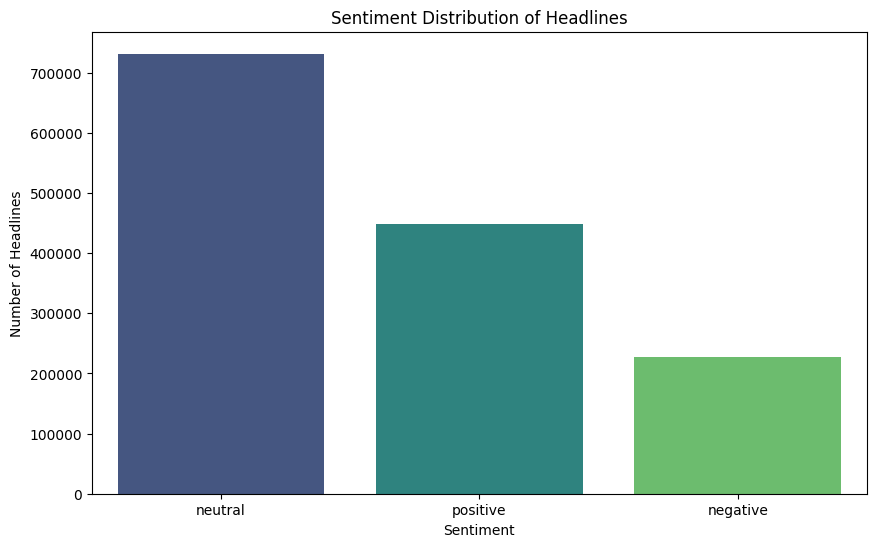

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['sentiment_class'], palette='viridis') 
plt.title('Sentiment Distribution of Headlines') 
plt.xlabel('Sentiment') 
plt.ylabel('Number of Headlines') 
plt.show()

0           neutral
1           neutral
2           neutral
3           neutral
4          positive
             ...   
1407323    positive
1407324    negative
1407325     neutral
1407326     neutral
1407327     neutral
Name: sentiment_class, Length: 1407328, dtype: object